# Homework 3

##### Data: Homework_3_Data.txt, housedata.zip

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, September 29th, 2018 at 11:59pm

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [16]:
import numpy as np
import scipy.stats
import scipy.special

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
import seaborn as sns
%matplotlib inline

## Question 1: When have no confidence that you can lift yourself by the Bootstrap?

**Coding required**

The idea behind non-parametric bootstrapping is that sampling distributions constructed via the true data generating process should be very close to sampling distributions constructed by resampling.  We mentioned in lab that one edge cases for bootstrapping is calculating order statistics.  Let's explore this edgecase.

1.1. Suppose you have $\{X_1, X_2, ... X_n\}$ datapoints such that $X_i$ are independently and identically drawn from a $Unif(0, \theta)$.  Consider the extreme order statistic Y = $X_{(n)}$ = max($X_1, X_2, ... X_n$). Write an expression for the distribution $f_Y(Y|\theta)$.

1.2. Derive $\hat{\theta}$ the maximum likelihood estimate for $\theta$ given datapoints $\{X_1, X_2, ... X_n\}$.

1.3. To see an alternate potential estimator use the distribution you derived in 1.1. to find an expression for the unbiased estimate of  theta.

1.4. Use scipy/numpy to generate 100 samples {$X_i$} from Unif(0,1) (i.e. let $\theta$ = 1) and store them in the variable `original_xi_samples`.  Based on your data sample, what's the empirical estimate for $\theta$.

1.6. Use non-parametric bootstrap to generate a sampling distribution of 1000 estimates for theta.  Plot a histogram of your sampling distribution.  Make sure to title and label the plot.  

1.7. Is your histogram smooth?  From visual inspection does it seem like a good representation of a sampling distribution?

1.8. So far we've used a "natural" version of calculating bootstrap confidence intervals -- the percentile method.  In this situation is it possible for the "true" value of $\theta$ to be in the confidence interval?  In order to remedy this we'll use a alternate confidence interval version called the pivot confidence interval.  The pivot confidence interval is defined as [$2\hat{\theta} -\hat{\theta}^*_{(0.975)},2\hat{\theta} -\hat{\theta}^*_{(0.025)}$].  Is the true value contained in this interval?


<div class="answer-separator">
------------------------
</div>

## Question 2: Visualize Your Poor Marginlized Conditional Love

**Coding required**

Read the data set contained in [Homework_3_Data.txt](Homework_3_Data.txt). Each data point is a two-dimensional vector, $\mathbf{x} = (x_1, x_2)$.



2.2. We assume that the data was generated by some probability distribution (pdf).  Visualize that pdf, $f_X$.

2.3. Visualize the conditional distribution defined by $f_{x_2 \mid x_1}$ for $x_1 \in [3.99, 4.01]$.

2.4. Visualize the mariginal distribution defined by $f_{x_1}$.

2.5. Empirically estimate the mean of the distribution $f_{x_1}$. Estimate, also the SE (standard error) of the estimate.

2.6. Empirically estimate the standard deviation of the distribution $f_{x_2 \mid x_1}$, for $x_1 \in [3.99, 4.01]$. Estimate, also the SE (standard error) of the estimate.

2.7. Given the SE, How many digits in your standard deviation estimate are significant? Explain why.

In obtaining estimates for this problem we want you to 

- define a function called *get_bootstrap_sample(dataset)* to generate each bootstrap sample
- and then another function *perform_bootstrap(dataset)* to generate all the samples. 

They should both take as parameters the dataset from which you'll be drawing samples. *perform_bootstrap* should call *get_bootstrap_sample* and return a sequence of bootstrap samples.  *get_bootstrap_sample* should return an individual bootstrap sample.


** 2.1. Make a 2-D visualization of the empirical distribution of the data. **

In [17]:
data = pd.read_csv("../data/Homework_3_Data.txt", header=None, names=['x', 'y'])
data.head()

,x,y
0,3.008992,6.205285
1,4.845897,4.864804
2,5.137567,4.536671
3,4.766038,4.158884
4,4.242169,4.070555


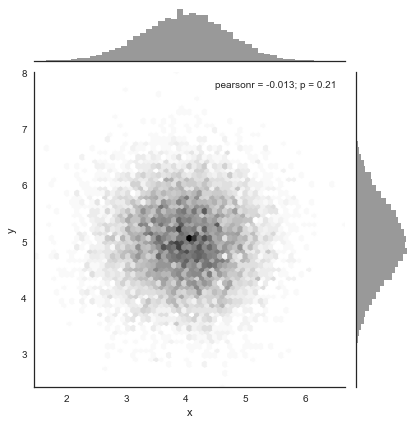

In [22]:
with sns.axes_style("white"):
    sns.jointplot(x=data['x'], y=data['y'], kind="hex", color="k");

<div class="answer-separator">
------------------------
</div>

## Problem 3: Linear Regression

Consider the following base Regression class, which roughly follows the API in the python package `scikit-learn`.

Our model is the the multivariate linear model whose MLE solution or equivalent cost minimization was talked about in lecture:

$$y = X\beta + \epsilon$$
where $y$ is a length $n$ vector, $X$ is an $m \times p$ matrix created by stacking the features for each data point, and $\beta$ is a $p$ length vector of coefficients.

The class showcases the API:

$fit(X, y)$: Fits linear model to $X$ and $y$.

$get\_params()$: Returns $\hat{\beta}$ for the fitted model. The parameters should be stored in a dictionary with keys "intercept" and "coef" that give us $\hat{\beta_0}$ and $\hat{\beta_{1:}}$. (The second value here is thus a numpy array of coefficient values)

$predict(X)$: Predict new values with the fitted model given $X$.

$score(X, y)$: Returns $R^2$ value of the fitted model.

$set\_params()$: Manually set the parameters of the linear model.



In [24]:
class Regression(object):
    
    def __init__(self):
        self.params = dict()
    
    def get_params(self, k):
        return self.params[k]
    
    def set_params(self, **kwargs):
        for k,v in kwargs.items():
            self.params[k] = v
        
    def fit(self, X, y):
        raise NotImplementedError()
        
    def predict(self, X):
        raise NotImplementedError()
        
    def score(self, X, y):
        raise NotImplementedError()

**3.1. In a jupyter notebook code cell below we've defined and implemented the class `Regression`.  Inherit from this class to create an ordinary least squares Linear Regression class called AM207OLS.  Your class will implement an sklearn-like api.  It's signature will look like this:**

`class OLS(Regression):`

Implement `fit`, `predict` and `score`. This will involve some linear algebra. (You might want to read up on pseudo-inverses before you directly implement the linear algebra on the lecure slides).

The $R^2$ score is defined as: $${R^{2} = {1-{SS_E \over SS_T}}}$$

Where:

$$SS_T=\sum_i (y_i-\bar{y})^2, SS_R=\sum_i (\hat{y_i}-\bar{y})^2, SS_E=\sum_i (y_i - \hat{y_i})^2$$
where  ${y_i}$ are the original data values, $\hat{y_i}$ are the predicted values, and $\bar{y_i}$ is the mean of the original data values.



In [25]:
class OLS(Regression):
    """
    Implements ordinary least squares
    """
    def fit(self, X, y):
        # Add constant feature for bias
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X])
        # Solve OLS
        coefs = pinv(X_ext.T.dot(X_ext)).dot(X_ext.T).dot(y)
        self.params['intercept'] = coefs[0]
        self.params['coef'] = coefs[1:]
    
    def score(self, X, y):
        preds = self.predict(X)
        residuals = preds - y
        RSS = np.sum(residuals ** 2)
        
        mean = np.mean(y)
        SS = np.sum((mean - y) ** 2)
        
        R2 = 1 - RSS / SS
        return R2
        
    
    def predict(self, X):
        return self.params['intercept'] + X.dot(self.params['coef'])

**3.2.  We'll create a synthetic data set using the code below. (Read the documentation for `make_regression` to see what is going on).  **

Verify that your code recovers these coefficients approximately on doing the fit. Plot the predicted `y` against the actual `y`. Also calculate the score using the same sets `X` and `y`. The usage will look something like:

```python
lr = OLS()
lr.fit(X,y)
lr.get_params['coef']
lr.predict(X,y)
lr.score(X,y)```

In [34]:
from sklearn.datasets import make_regression
import numpy as np
np.random.seed(99)
X, y, coef = make_regression(30,10, 10, bias=1, noise=2, coef=True)
coef

array([76.6568183 , 77.67682678, 63.78807738, 19.3299907 , 59.01638708,
       53.13633737, 28.77629958, 10.01888939,  9.25346811, 59.55220395])

In [30]:
from numpy.linalg import pinv
lr = OLS()
lr.fit(X, y)
coefs = lr.get_params('coef')
print("Fitted coefficients: \n", coefs)
preds = lr.predict(X)
print("R^2 Score: {}".format(lr.score(X, y)))

Fitted coefficients: 
 [77.20719705 76.51004831 62.97865316 18.4436452  58.50019885 53.25126559
 28.29088241  9.33333359 10.29584457 59.1606719 ]
R^2 Score: 0.9999155832062194


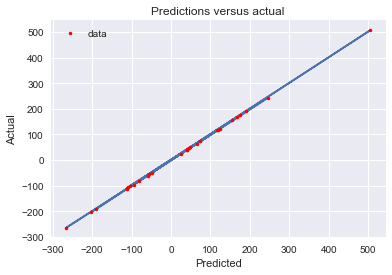

In [47]:
plt.plot(preds, y, '-')
plt.plot(preds, y, 'r.', label='data')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predictions versus actual")
plt.legend()

<div class="answer-separator">
------------------------
</div>

## Question 4: Is the Incumbent of the House in?

We shall consider US House data from 1896 to 1990. This dataset was compiled for [Gelman, Andrew, and Gary King. "Estimating incumbency advantage without bias." American Journal of Political Science (1990): 1142-1164.](http://gking.harvard.edu/files/gking/files/inc.pdf). Why incumbency and why the house? The house gives us lots of races in any given year to validate our model, and in elections which happen every two years, where demography hasn't changed much, incumbency is a large effect, as might be the presence of a national swing (which we would capture in an intercept in a regression).

Let us, then, imagine a very simplified model in which the democratic party's fraction of the vote in this election, for seat(county) $i$, at time $t$ years, $d_{i,t}$, is a linear combination of the democratic party's fraction of the vote in the previous election, at time $t-2$, $d_{i, t-2}$, and a categorical variable $I_{i,t}$, which characterizes the nature of the candidate running in this election:

$$
I =
\begin{cases} 
      -1 & \texttt{Republican Incumbent Running} \\
       0 & \texttt{New Candidate Running} \\
       1 & \texttt{Democratic Incumbent Running}
\end{cases}
$$

We use the statsmodels formula notation: 

`DP1 ~ DP + I`.

This means linear regress DP, the democratic fraction of the vote this time around for a given house seat on DP1 which is the democratic fraction the previous time around and I, a "factor" or categorical(nominal) variable with 3 levels.

In mathematical notation this regression is:

$$d_{t,i} = \beta_1 d_{i, t-2} + \beta_2 I_{i,t} + \beta_0,$$

where $d_{i, t-2}$ is the democratic fraction in county $i$ at the previous election, and $I_{i,t}$ is the factor above which tells us if (and from which party: 1 for dems, -1 for reps) an incumbent is running. We want to find $\beta_0,\beta_1,\beta_2$.

Notice that we are regressing on a discrete variable `I`. This incumbency factor takes values 1, -1, or 0. As such it only changes the *intercept* of the regression. You can think of it as 3 regression lines, one for each subpopulation of incumbency, with their *slope constrained to be the same*. An intercept of $\beta_0$ for open seats, $\beta_2+\beta_0$ for Democratic incumbents and $-\beta_2+\beta_0$ for Republican incumbents.

You then think a little bit more and realize that, for example, in many conservative districts you will have a republican elected whether he/she is an incumbent or not. And you now realize that our analysis does not consider the party of the incumbent. So you decide to fix this

Lets define $P_{t,i}$ as the party in power right now before the election at time $t$, i.e. the party that won the election at time $t-2$ in county $i$. It takes on values:

$$
P =
\begin{cases} 
      -1 & \texttt{Republican Seat holder} \\
       1 & \texttt{Democratic Seat holder}
\end{cases}
$$
We can do this regression instead:

`DP1 ~ DP + I + P`, where

$P$ represents the incumbent party, i.e. the party which won the election in year t−2.

In mathematical notation we have:

$$d_{t,i} = \beta_1 d_{t-2,i} + \beta_2 I_{t,i} + \beta_3 P_{t,i} + \beta_0 ,$$
where $P_{t,i}$ is the party in power right now before the election at time $t$, i.e. the party that won the election at time $t-2$ in county $i$. The value of $P$ is 1 for democrats, and -1 for republicans.

### Interpretable Regressions

One can say that the coefficient of $I$ now more properly captures the ￼effect of incumbency, after controlling for party.

Regression coefficients become harder to interpret with multiple features. The meaning of any given coefficient depends on the other features in the model. Gelman and Hill advise: Typical advice is to interpret each coefficient “with all the other predictors held constant.”[Gelman, Andrew; Hill, Jennifer (2006-12-25). Data Analysis Using Regression and Multilevel/Hierarchical Models] Economists like to use the phrase "ceteris paribus" to describe this.

The way to do this is interpretation to look at the various cases and explain what the co-efficients of $P$ and $I$ mean. Let us at first set $I$ to 0 meaning no incumbents and explain what the coefficients of $P$ mean. We are then fitting:

$$d_{t,i} = \beta_1 d_{t-2,i} + \beta_3 P_{t,i} + \beta_0 ,$$
which for the $P=1$ (Democrat party winning the past election) case, gives us:

$$d_{t,i} = \beta_1 d_{t-2,i} + \beta_3 + \beta_0 ,$$
and, for the $P=-1$ (Republican party winning the past election) case, gives us:

$$d_{t,i} = \beta_1 d_{t-2,i} - \beta_3 + \beta_0 .$$
You can see that $\beta_3$ then captures half the difference in the effect between democrats and republicans that comes from just having the party incumbent. It tells us that, with respect to the national swing measure $\beta_0$, whats the party effect for republicans and democrats. It does it very poorly by splitting the difference between the democratic and republican party effects and being constant across seats, but its a start.




In [15]:
pairs=[
    (1898,1896),
    (1900,1898),
    (1904,1902),
    (1906,1904),
    (1908, 1906),
    (1910, 1908),
    (1914, 1912),
    (1916, 1914),
    (1918, 1916),
    (1920, 1918),
    (1924, 1922),
    (1926, 1924),
    (1928, 1926),
    (1930, 1928),
    (1934, 1932),
    (1936, 1934),
    (1938, 1936),
    (1940, 1938),
    (1944, 1942),
    (1946, 1944),
    (1948, 1946),
    (1950, 1948),
    (1954, 1952),
    (1956, 1954),
    (1958, 1956),
    (1960, 1958),
    (1964, 1962),
    (1966, 1964),
    (1968, 1966),
    (1970, 1968),
    (1974, 1972),
    (1976, 1974),
    (1978, 1976),
    (1980, 1978),
    (1984, 1982),
    (1986, 1984),
    (1988, 1986),
    (1990, 1988)
]

Each CSV file has the following information:

- a number for the state
- a number for the district
- D1 and R1, the dem and repub percentages in the past election, and I1 the incumency back then
- D and R, the dem and repub percentages in the present election, and I the incumbency now
- P, the incumbent party from the past election in that seat, 1 for democrats, -1 for republicans
- PNOW, the party which won the current election, 1 for democrats, -1 for republicans
- A variable we'll call $T$ (for treatment),where we want to decide if we should replace an incumbent for a new candidate, or not. 
$$
T =
\begin{cases} 
      0 & \texttt{Incumbent Running} \\
      1 & \texttt{New Candidate Running}
\end{cases}
$$

(This column is not used in this homework)

In [22]:
pairframes={}
for p in pairs:
    key = str(p[0])+"-"+str(p[1])
    pairframes[key] = pd.read_csv("data/{}.csv".format(key))

To get warmed up, let us consider the 1988-1990 election pair.

In [25]:
pairframes['1990-1988'].head()

To carry out the linear regression we'll use `statsmodels` from python, using the `ols`, or Ordinary Least Squares method defined there.

We use the `statsmodels` formula notation. `DP ~ DP1 + I` means linear regress `DP`, the democratic fraction of the vote this time around for a given house seat on `DP1` which is the democratic fraction the previous time around and `I`, a "factor" or categorical(nominal) variable with 3 levels: 

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

In [27]:
ols_model = ols('DP ~ DP1 + I', pairframes['1990-1988']).fit()
ols_model

In [28]:
ols_model.summary()

### Interpretable Regressions

One can say that **The coefficient of `I` now more properly captures the ￼effect of incumbency, after controlling for party.**

Regression coefficients become harder to interpret with multiple features. The meaning of any given coefficient depends on the other features in the model. Gelman and Hill advise: **Typical advice is to interpret each coefficient “with all the other predictors held constant.”**[Gelman, Andrew; Hill, Jennifer (2006-12-25). Data Analysis Using Regression and Multilevel/Hierarchical Models] Economists like to use the phrase "ceteris paribus" to describe this.

The way to do this is interpretation to look at the various cases and explain what the co-efficients of `P` and `I` mean. Let us at first set `I` to 0 meaning no incumbents and explain what the coefficients of `P` mean. 
We are then fitting:

$$d_{t,i} = \beta_1 d_{t-2,i} + \beta_3 P_{t,i} + \beta_0 ,$$

which for the $P=1$ (Democrat party winning the past election) case, gives us:

$$d_{t,i} = \beta_1 d_{t-2,i} + \beta_3 + \beta_0 ,$$

and, for the $P=-1$ (Republican party winning the past election) case, gives us:

$$d_{t,i} = \beta_1 d_{t-2,i} - \beta_3 + \beta_0 .$$

You can see that $\beta_3$ then captures half the difference in the effect between democrats and republicans that comes from just having the party incumbent. It tells us that, with respect to the national swing measure $\beta_0$, whats the party effect for republicans and democrats. It does it very poorly by splitting the difference between the democratic and republican party effects and being constant across seats, but its a start.



### 4.1 Explain the coefficient of Incumbency

**Use a similar argument to the one above**. 

(Note that setting $I$ to 1 also constrains $P$ to 1, but the reverse is not true as we saw above).

*your answer here*


### 4.2 Carry out the linear regression `DP ~ DP1 + I + P` for all the year pairs

**Present the results in a dataframe `ols_frame`. Comment on the trend in the incumbency coefficients after 1960.**

(FORMAT: This dataframe has columns `yp`, the year-pair string (the keys of the dictionary of frames), the year for which we do the regression `year` (the higher year in the pair), the `formula`, which is just repeated, and the R-squared in `R2` for each regression, as well as the parameters of the regression and the p-values for the regression (for the name of the column here prefix the parameter with `p_` to denote the p-value).)

In [33]:
# your code here


In [34]:
# your code here


*your answer here*


### 4.3 Bootstrap a distribution for the coefficient of I for 1990-1988

**Plot a histogram of the distribution* of the co-efficient. Also print the the 2.5th and 97.5th quantile of the distribution to give a non-parametric confidence interval, plotting these on the histogram. What conclusions can you draw?**

(Hint: Bootstrap involves sampling with replacement from the data and recalculating the quantity of interest, in our case the regression. This will give you a new coefficient for each regression. If you're interested in using the method for more complex applications it if imperative to familiarize with the assumptions, [this](http://stats.stackexchange.com/questions/26088/explaining-to-laypeople-why-bootstrapping-works) is a good start, but [this article](https://goo.gl/2T6k8j) is also helpful.)

In [36]:
#your code here


### 4.4 Inference using p-values over time

Of-course, another more classic way of doing this same inference is though the regression itself -- it give us p-values. These are values from a t-test that asks if the coefficient is different from 0. The regression machinery assumes Normality of errors for this purpose. Lets assume the Normality and do an inference on all the years in our regression. The assumption used to calculate these p-values are: for each model (in our case `year`), the errors at each point of the regression are uncorrelated and follow a Normal distribution. We shall assume these to be true for now (in real life you ought to be checking a plot of residuals as well).

Generally we'd like the p-values to be vanishingly small as they *represent the probability that we observed such an extreme incumbency effect purely by chance*. Have a look at the Wikipedia page on [p-values](https://en.wikipedia.org/wiki/P-value) for a quick reminder.

Furthermore, when constructing results like this (where there are many tests considered at once) there are other concerns to take into account. One such concern is the issue of [multiple testing](https://en.wikipedia.org/wiki/Multiple_comparisons_problem). This is important because when we start dealing with a **large number** of hypotheses jointly the probability of making mistakes gets larger, hence we should be **more stringent** about what it means for a result to be significant. One such correction is the [**Bonferroni Correction**](https://en.wikipedia.org/wiki/Bonferroni_correction) which provides a new bound for deciding significance. Instead of asking the classic question: **is the p-value < $0.05$**?, this considers instead a stricter bound, we ask: **is p-value < $0.05/H$**. Where $H$ is the number of hypotheses being considered, in our case $H = 38$ (the number of years) -- this is a much higher bar for significance.

**Plot a graph of incumbency (`I`) coefficient p-vales for every year. Use this plot to study if the coefficients after 1960 are significantly different from 0.** (Plot them in log scale for easier viewing of small numbers. Also draw lines at $\log(0.05)$ and $\log(0.05/38)$ for reference). **Interpret your results**.

In [37]:
#your code here


*your answer here*


### 4.5 Carry out the linear regression with an interaction between the previous elections democratic fraction and this elections incumbency, for all the year pairs

**Is the regression complete? Or do we need more features?**

Recall that our model is fairly restrictive, the different incumbency groups are allowed to have different intercepts but the new candidate group, $I = 0$ is equally between the two incumbency groups. Furthermore, the incumbency groups are not allowed different slopes, meaning the effect of the previous elections Democratic fraction (`DP1`) is assumed the same for all incumbency groups. This may not be the case. 

In the figure below we can see that in fact the different groups seem to have not only different intercepts, but also possibly different slopes. 

In [38]:
sns.lmplot(x="DP1", y="DP", hue = "I", data=pairframes['1990-1988'], size = 7, aspect=1.2)

**Carry out the regression with an between the previous elections democratic fraction and this elections incumbency, for each year pair. Is there evidence for interaction? How can you know for sure? **

(HINT: In mathematical notation this regression is:

$$d_{t,i} = \beta_4 d_{i, t-2} I_{i,t} + \beta_3 I_{i,t} + \beta_2 P_{i,t} + \beta_4 I_{i,t} d_{i, t-2} + \beta_0,$$

In `statsmodels` notation, we wish to carry out the regression:

`DP ~ DP1 + I + P + DP1:I` )


In [39]:
#your code here


In [40]:
#your code here


*your answer here*
